Import Packages

In [1]:
import sys
sys.path.append('C:/Users/Josh Ellis/OneDrive - University of Nebraska at Omaha/COURSES/FALL_2022/ISQA8156-820/course-project')

import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px
from statsmodels.formula.api import ols
import statsmodels.api as sm

from src.stat_methods import FishersLSD
from src.processing import prepost_transform

### Prepare Data

Read pre-processed data from github
- See src/processing/raw_data_processing.py for raw data processing steps

In [2]:
data = pd.read_csv(r'C:\Users\Josh Ellis\OneDrive - University of Nebraska at Omaha\COURSES\FALL_2022\ISQA8156-820\course-project\data\processed\girls_rock_data.csv')

print(f'shape: {data.shape}')
data.head()

shape: (360, 22)


,client,age_group,year,test_type,age,years_at_camp,race/ethnicity,zip_code,15. Wear the kind of clothes you like even if they are different from what others wear.,"16. In a line-up, tell a student who pushes in front of you to wait his or her turn.",...,19. Join a school club or sports team.,20. Express your feelings to another kid.,21. Ask someone over to your house on a Saturday.,22. Ask someone to go to a school dance or movie with you.,23. Go to a party where you are sure you won’t know any of the kids.,24. Ask another student for help when you need it.,25. Make friends with kids your age.,"1. You can learn new things, but you can’t really change your basic intelligence.",2. Your intelligence is something about you that you can’t change very much.,3. You have a certain amount of intelligence and you really can’t do much to change it.
0,1681042018,older group,2018,pre-test,14,2,caucasian,68104.0,4,4.0,...,4.0,4,5,4.0,4.0,4.0,4.0,5.0,5.0,5.0
1,2681042018,older group,2018,pre-test,14,1,caucasian,68104.0,6,5.0,...,7.0,5,5,5.0,6.0,7.0,6.0,3.0,3.0,3.0
2,3515342018,older group,2018,pre-test,16,5,caucasian,51534.0,7,4.0,...,5.0,5,4,5.0,4.0,6.0,6.0,3.0,4.0,5.0
3,4685062018,older group,2018,pre-test,15,5,caucasian,68506.0,5,2.0,...,1.0,2,2,3.0,2.0,2.0,3.0,5.0,6.0,6.0
4,5681052018,older group,2018,pre-test,13,4,caucasian,68105.0,7,4.0,...,7.0,7,7,7.0,7.0,7.0,7.0,2.0,3.0,3.0


Transform Data to be analyzed
- See src/processing/prepost_transform.py for transformation processing

In [3]:
data_transformed = prepost_transform(data)

print(f'shape: {data_transformed.shape}')
data_transformed.head()

shape: (2520, 9)


,client,age_group,year,age,race/ethnicity,question,score_pretest,score_posttest,delta
0,1681042018,older group,2018,14,caucasian,15,4.0,7.0,3.0
1,2681042018,older group,2018,14,caucasian,15,6.0,5.0,-1.0
2,3515342018,older group,2018,16,caucasian,15,7.0,7.0,0.0
3,4685062018,older group,2018,15,caucasian,15,5.0,5.0,0.0
4,5681052018,older group,2018,13,caucasian,15,7.0,7.0,0.0


---

# Descriptive Statistics

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

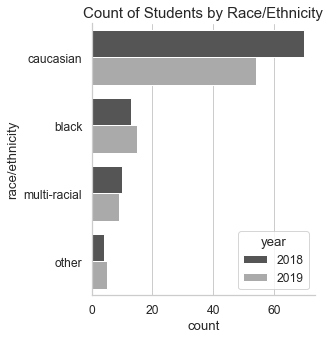

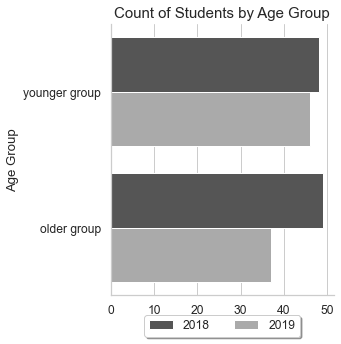

In [5]:
# count of participants within each Race/Ethnicty group
sns.set(font_scale=1.1)
sns.set_color_codes("pastel")
sns.set_style('whitegrid')
plt.figure(figsize=(4, 5))
sns.countplot(
    y="race/ethnicity",
    data=data[data['test_type']=='pre-test'],
    order = data['race/ethnicity'].value_counts().index,
    hue='year', palette="gray"
)

plt.title('Count of Students by Race/Ethnicity', fontsize=15)
sns.despine()

# count of participants within each age group
sns.set(font_scale=1.1)
sns.set_color_codes("pastel")
sns.set_style('whitegrid')
plt.figure(figsize=(4, 5))
sns.countplot(
    y="age_group",
    data=data[data['test_type']=='pre-test'],
    order = data['age_group'].value_counts().index,
    hue='year', palette="gray"
)

plt.title('Count of Students by Age Group', fontsize=15)
# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.ylabel('Age Group')
sns.despine()

In [6]:
data_stats = data.describe().T[['mean', 'std', 'min', 'max']].drop(index=['year', 'zip_code'])
data_stats

,mean,std,min,max
age,12.438889,1.718858,10.0,16.0
years_at_camp,2.572222,1.897163,1.0,8.0
15. Wear the kind of clothes you like even if they are different from what others wear.,6.147222,1.209523,2.0,7.0
"16. In a line-up, tell a student who pushes in front of you to wait his or her turn.",5.580556,1.520211,1.0,7.0
17. Stand up for yourself when another kid in class makes fun of you.,5.886111,1.325064,1.0,7.0
18. Help a student who is visiting your school for a short time to have fun and interesting experiences.,5.944444,1.171729,1.0,7.0
19. Join a school club or sports team.,6.022222,1.449063,1.0,7.0
20. Express your feelings to another kid.,4.652778,1.722857,1.0,7.0
21. Ask someone over to your house on a Saturday.,5.888889,1.407853,1.0,7.0
22. Ask someone to go to a school dance or movie with you.,4.641667,1.813578,1.0,7.0


Text(0.5, 1.0, 'Mean Scores for all Questions')

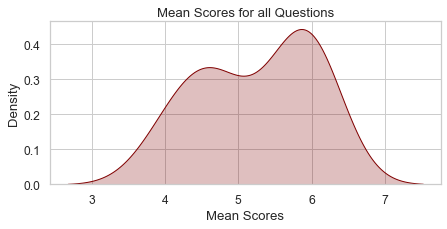

In [7]:
plt.figure(figsize=(7, 3))

# KDE for Means
sns.kdeplot(
    data = data_stats.drop(index=['age', 'years_at_camp']),
    x='mean',
    fill=True,
    color='maroon')
plt.xlabel('Mean Scores')
plt.title('Mean Scores for all Questions')

Text(0.5, 1.0, 'Standard Deviations for all Questions')

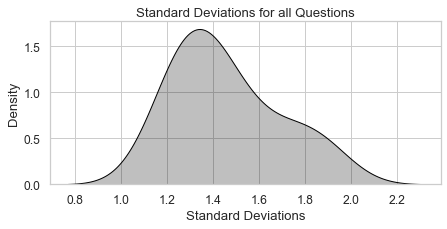

In [8]:
plt.figure(figsize=(7, 3))

# KDE for Standard Deviations
sns.kdeplot(
    data=data_stats.drop(index=['age', 'years_at_camp']),
    x='std',
    fill=True,
    color='black')
plt.xlabel('Standard Deviations')
plt.title('Standard Deviations for all Questions')

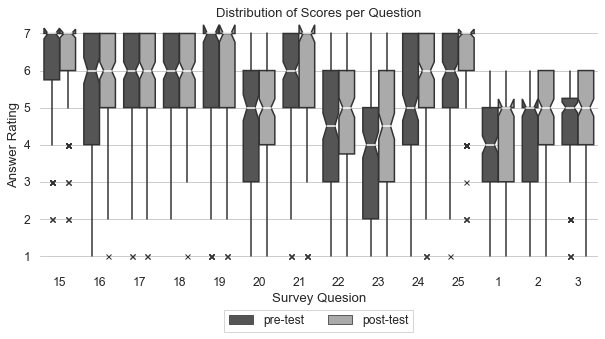

In [9]:
boxplot_df = data.copy()
boxplot_df = boxplot_df.drop(columns=['age_group', 'year', 'age', 'years_at_camp', 'race/ethnicity', 'zip_code', 'client'])
boxplot_df.columns = [col.split('.')[0] for col in boxplot_df.columns]
boxplot_df = boxplot_df.melt(id_vars='test_type', var_name='question')

sns.set_style("whitegrid")
plt.figure(figsize=(10,4.5))
sns.boxplot(
    data=boxplot_df,
    x='question',
    y='value',
    hue='test_type',
    notch=True,
    showcaps=False,
    palette="gray",
    flierprops={"marker": "x"},
    medianprops={"color": "white"})
plt.title('Distribution of Scores per Question')
plt.ylabel('Answer Rating')
plt.xlabel('Survey Quesion')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=5)
sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Correlation Heatmap Across Survey Questions')

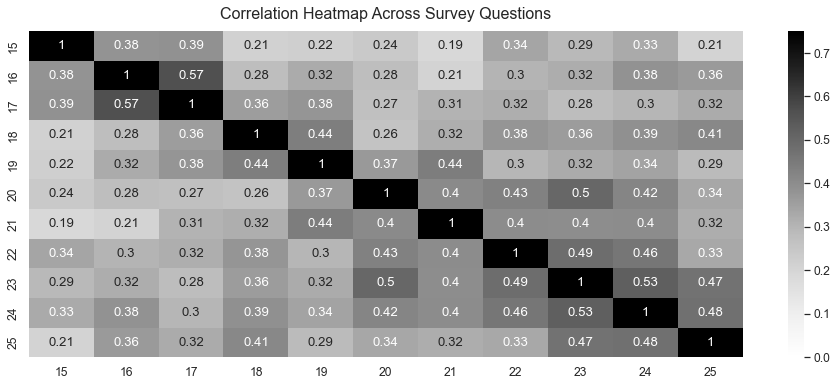

In [10]:
# Set a copy of the data
data_corr = data.copy()

# Transform data to a correlation matrix
data_corr = data_corr.iloc[:, 8:19]
data_corr.columns = [col.split('.')[0] for col in data_corr.columns]

# Plot Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_corr.corr(), vmin=0, vmax=.75, annot=True, cmap='Greys')
heatmap.set_title('Correlation Heatmap Across Survey Questions', fontdict={'fontsize':16}, pad=12)

### **Research Focus 1**
Are there significant differences in answer ratings for various outcomes between the younger group and the older group? This topic will help OGR better understand which survey questions significantly improve throughout the duration of the program.
- **Question 1:** Are the mean survey score different between the older group and younger group?
- **Question 2:** Do the results from the OGR program differ between age groups?

**Question 1:**
- Are the mean survey score different between the older group and younger group?
    

In [11]:
q1_pretest = data_transformed[['age_group', 'score_pretest']].rename(columns={'score_pretest': 'score'})
q1_posttest = data_transformed[['age_group', 'score_posttest']].rename(columns={'score_posttest': 'score'})
q1_data = pd.concat([q1_pretest, q1_posttest])

older_group_scores = q1_data[q1_data['age_group'] == 'older group']['score']
younger_group_scores = q1_data[q1_data['age_group'] == 'younger group']['score']

tstatistic, pvalue = stats.ttest_ind(older_group_scores, younger_group_scores)

age_group = ['older group', 'younger group']
n = [len(older_group_scores), len(younger_group_scores)]
mean = [older_group_scores.mean(), younger_group_scores.mean()]
stdev = [older_group_scores.std(), younger_group_scores.std()]
summary_data = pd.DataFrame({
    'Age Group': age_group,
    'n': n,
    'Mean': mean,
    'StDev': stdev
})

print(f'statistic = {tstatistic}, pvalue = {pvalue}')
summary_data

statistic = 0.49378773154887234, pvalue = 0.6214776243936533


,Age Group,n,Mean,StDev
0,older group,2408,5.252076,1.589850
1,younger group,2632,5.229103,1.702822


In [12]:
fig = px.violin(q1_data, x='age_group', y='score',
          box=True, template='plotly_white',
          title='Survey Scores by Age Group',
          color='age_group',
          color_discrete_map = {
              'older group': 'black',
              'younger group': 'grey'
          },
          labels={
              'age_group': 'Age Group',
              'score': 'Answer Ratings'
          })

fig.update_layout(
    autosize=False,
    width=1000,
    height=400,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ),
    font=dict(
        size=14,
        color="Black"
    )
)

fig.show()

**Question 2:**
- Does the effectiveness of the Omaha Girls Rock program differ between age groups? Which questions by age group show a significant improvement in survey scores after participating in the Omaha Girls Rock Program?

- **Statistical Test**:
    - Right-tailed dependent (matched-sample) t-test at a 5% level of significance
    - Individual test for each question-age group combination (2 groups x 14 questions)

- **Hypotheses**:
    - $H_0: \mu_d \le 0$
    - $H_a: \mu_d > 0$

In [13]:
age_data = data_transformed[['age_group', 'question', 'score_pretest', 'score_posttest', 'delta']].copy()

# Prepare a list of individual dataframes for each test (28 Total)
sample_data_list = []
for age_group in age_data['age_group'].unique():
    for question in age_data['question'].unique():
        test_data = (
            age_data[
                (age_data['age_group'] == age_group) &
                (age_data['question'] == question)]
            [['age_group', 'question', 'score_pretest', 'score_posttest']]
        )
        sample_data_list.append(test_data)

# field lists for results table
group_li = []
question_li = []
pretest_mean_li = []
posttest_mean_li = []
test_statistic_li = []
pvalue_li = []
conclusion_li = []

# Run a dependent t-test for each dataframe in data_list and store results in the respective field list
for sample in sample_data_list:
    # Get Pre and Post Test Scores
    pretest_scores = sample['score_pretest']
    posttest_scores = sample['score_posttest']

    # Run dependent t-test
    test = stats.ttest_rel(
        posttest_scores,
        pretest_scores,
        alternative='greater')
    
    # Create Results
    pvalue = test[1]
    
    if round(pvalue, 3) <= .050:
        conclusion_li.append('Significant')
    else:
        conclusion_li.append('Not Significant')
    
    pvalue_li.append(round(pvalue, 3))
    test_statistic_li.append(round(test[0], 3))
    group_li.append(sample.iloc[0,0])
    question_li.append(sample.iloc[0,1])
    pretest_mean_li.append(round(pretest_scores.mean(), 3))
    posttest_mean_li.append(round(posttest_scores.mean(), 3))


# create results table
results = pd.DataFrame({
    'group': group_li,
    'question': question_li,
    'pre-test mean': pretest_mean_li,
    'post-test mean': posttest_mean_li,
    'test statistic': test_statistic_li,
    'p-value': pvalue_li,
    'conclusion': conclusion_li
})

results

,group,question,pre-test mean,post-test mean,test statistic,p-value,conclusion
0,older group,15,5.814,6.012,1.660,0.050,Significant
1,older group,16,5.244,5.616,2.833,0.003,Significant
2,older group,17,5.616,5.779,1.177,0.121,Not Significant
3,older group,18,5.791,5.988,1.805,0.037,Significant
4,older group,19,5.907,6.081,1.706,0.046,Significant
5,older group,20,4.698,5.198,3.209,0.001,Significant
6,older group,21,5.953,5.907,-0.376,0.646,Not Significant
7,older group,22,4.640,4.977,2.154,0.017,Significant
8,older group,23,3.581,4.221,4.124,0.000,Significant
9,older group,24,5.012,5.535,3.565,0.000,Significant


**Question 2:**
- Is there a statistically significant difference between the delta scores of the Older Group and Younger Group (per question)

- **Statistical Test**:
    - Independent t-test about the means between the delta scores for the Younger Group ($\mu_1$) and Older Group ($\mu_2$).
    - Conduct an individual t-test for each question-age group combination (2 groups x 14 questions)

- **Hypotheses:**
    - $𝐻_0: \mu_1 − \mu_2 \le 0$
    - $𝐻_a: \mu_1 − \mu_2 > 0$


In [14]:
mean_younger_li = []
mean_older_li = []
question_li = []
pvalue_li = []
test_statistic_li = []
conclusion_li = []

for question in age_data['question'].unique():
    younger_delta = age_data[(age_data['question']==question) & (age_data['age_group']=='younger group')]['delta']
    older_delta = age_data[(age_data['question']==question) & (age_data['age_group']=='older group')]['delta']
    
    ttest = stats.ttest_ind(younger_delta, older_delta)
    test_statistic = ttest[0]
    pvalue = ttest[1]
    
    if pvalue < .05:
        conclusion_li.append('Significant')
    else:
        conclusion_li.append('Not Significant')
    
    question_li.append(question)
    mean_younger_li.append(np.mean(younger_delta))
    mean_older_li.append(np.mean(older_delta))
    test_statistic_li.append(test_statistic)
    pvalue_li.append(pvalue)
    
results = pd.DataFrame({
    'question': question_li,
    'younger group mean delta': mean_younger_li,
    'older group mean delta': mean_older_li,
    'test statistic': test_statistic_li,
    'p-value': pvalue_li,
    'conclusion': conclusion_li
})

results

,question,younger group mean delta,older group mean delta,test statistic,p-value,conclusion
0,15,0.000000,0.197674,-1.373268,0.171396,Not Significant
1,16,0.244681,0.372093,-0.649680,0.516736,Not Significant
2,17,0.138298,0.162791,-0.145374,0.884580,Not Significant
3,18,0.244681,0.197674,0.283995,0.776744,Not Significant
4,19,0.031915,0.174419,-0.834194,0.405290,Not Significant
5,20,0.319149,0.500000,-0.714668,0.475750,Not Significant
6,21,0.255319,-0.046512,1.533520,0.126923,Not Significant
7,22,0.468085,0.337209,0.508947,0.611420,Not Significant
8,23,0.468085,0.639535,-0.752280,0.452876,Not Significant
9,24,0.351064,0.523256,-0.817271,0.414866,Not Significant


---

### Research Topic 2
Does the race/ethnicity of participants influence the change in scores for various questions over time? 

**Experiment 1:** One-way ANOVA

In [15]:
race_data = data_transformed[['race/ethnicity', 'question', 'score_pretest', 'score_posttest', 'delta']].copy()
race_data.rename(columns={'race/ethnicity': 'race'}, inplace=True)

# Lists to capture data from each iteration
question_col = []
pvalue_col = []
result_col = []
caucasian_mean = []
black_mean = []
multi_mean = []
other_mean = []

# Iterate over each survey question and perform one-way anova
for question in race_data['question'].unique():    
    anova_race = race_data[race_data['question']==question]

    anova_race = anova_race[['race', 'delta']]
    
    caucasian_mean.append(round(anova_race[anova_race['race'] == 'caucasian']['delta'].mean(), 3))
    black_mean.append(round(anova_race[anova_race['race'] == 'black']['delta'].mean(), 3))
    multi_mean.append(round(anova_race[anova_race['race'] == 'multi-racial']['delta'].mean(), 3))
    other_mean.append(round(anova_race[anova_race['race'] == 'other']['delta'].mean(), 3))

    model = ols('delta ~ C(race)', data=anova_race).fit()
    anova_table = sm.stats.anova_lm(model,typ=1)
    pvalue = round(anova_table.iloc[0,-1],3)

    question_col.append(question)
    pvalue_col.append(pvalue)

    if pvalue > 0.05:
        result_col.append('Not Significant')
    else:
        result_col.append('Significant')

# Create results table
results_df = pd.DataFrame({
    'question': question_col,
    'caucasian delta': caucasian_mean,
    'black delta': black_mean,
    'multi-racial delta': multi_mean,
    'other race mean': other_mean,
    'pvalue': pvalue_col,
    'result': result_col
})

print('One-Way ANOVA Results, Treatment = Race/Ethnicity')
results_df

One-Way ANOVA Results, Treatment = Race/Ethnicity


,question,caucasian delta,black delta,multi-racial delta,other race mean,pvalue,result
0,15,0.073,0.107,0.211,0.111,0.952,Not Significant
1,16,0.339,-0.071,0.474,0.667,0.338,Not Significant
2,17,0.121,0.214,0.211,0.222,0.967,Not Significant
3,18,0.153,0.107,0.684,0.556,0.178,Not Significant
4,19,0.048,0.357,0.105,0.000,0.632,Not Significant
5,20,0.371,0.143,0.789,0.889,0.490,Not Significant
6,21,0.032,0.321,0.368,0.000,0.591,Not Significant
7,22,0.274,0.679,0.842,0.444,0.450,Not Significant
8,23,0.492,0.607,1.053,0.111,0.390,Not Significant
9,24,0.427,0.143,0.842,0.556,0.418,Not Significant


**Experiment 2:** Two-way ANOVA (Factorial Design)
- Factor A: Race/Ethnicity (4 Levels)
- Factor B: Question (14 Levels)

In [16]:
race_data = data_transformed[['race/ethnicity', 'question', 'delta']].copy()
race_data.columns = ['race', 'question', 'delta']

model = ols('delta ~ C(race, Sum)*C(question, Sum)', data=race_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
"C(race, Sum)",14.179763,3.0,2.834527,0.036888
"C(question, Sum)",69.376190,13.0,3.200368,0.000084
"C(race, Sum):C(question, Sum)",43.654663,39.0,0.671273,0.941117
Residual,4108.732241,2464.0,NaN,NaN


- Race: The mean change in scores from pre-test to post-test differs by race
- question: The mean change in scores from pre-test to post-test differs by race
- Interaction: The interaction between race and question is not significant

**Experiment 3**

In [17]:
personality_avova_df = data_transformed.copy()

personality_mapping = {
    '15': 'Openness',
    '16': 'Extraversion',
    '17': 'Extraversion',
    '18': 'Agreeableness',
    '19': 'Openness',
    '20': 'Agreeableness',
    '21': 'Extraversion',
    '22': 'Extraversion',
    '23': 'Openness',
    '24': 'Agreeableness',
    '25': 'Extraversion',
    '1': 'Growth Mindset',
    '2': 'Growth Mindset',
    '3': 'Growth Mindset'
}

personality_avova_df['question'] = personality_avova_df['question'].replace(personality_mapping)
personality_avova_df = personality_avova_df.rename(columns={'question': 'personality_trait', 'race/ethnicity': 'race'})

In [18]:
compare_personality_race = pd.concat([
    personality_avova_df[['personality_trait', 'race', 'score_pretest']].rename(columns={'score_pretest': 'score'}),
    personality_avova_df[['personality_trait', 'race', 'score_posttest']].rename(columns={'score_posttest': 'score'})
])

In [19]:
# Lists to capture data from each iteration
trait_col = []
pvalue_col = []
result_col = []

# Iterate over each survey question and perform one-way anova
for trait in personality_avova_df['personality_trait'].unique():    
    anova_race = personality_avova_df[personality_avova_df['personality_trait']==trait]

    anova_race = anova_race[['race', 'delta']]

    model = ols('delta ~ C(race)', data=anova_race).fit()
    anova_table = sm.stats.anova_lm(model,typ=1)
    pvalue = round(anova_table.iloc[0,-1],3)

    trait_col.append(trait)
    pvalue_col.append(pvalue)

    if pvalue > 0.05:
        result_col.append('Not Significant')
    else:
        result_col.append('Significant')

# Create results table
results_df = pd.DataFrame({
    'personality_trait': trait_col,
    'pvalue': pvalue_col,
    'result': result_col
})

results_df

,personality_trait,pvalue,result
0,Openness,0.363,Not Significant
1,Extraversion,0.713,Not Significant
2,Agreeableness,0.036,Significant
3,Growth Mindset,0.688,Not Significant


In [20]:
from pprint import pprint
lsd_test = FishersLSD(compare_personality_race, 'race', 'score', 'personality_trait', 'Growth Mindset', confidence=0.95)

pprint(lsd_test.plot())
lsd_test.table()

None


,pairs,abs_diff,critical_value,significance
0,caucasian vs. multi-racial,0.168718,0.263909,Populations are not significantly different
1,caucasian vs. black,0.661482,0.224133,Populations are significantly different
2,caucasian vs. other,0.067354,0.369800,Populations are not significantly different
3,multi-racial vs. black,0.830201,0.318395,Populations are significantly different
4,multi-racial vs. other,0.101365,0.433465,Populations are not significantly different
5,black vs. other,0.728836,0.410463,Populations are significantly different
